In [ ]:
# 🚀 Step 1: Import Required Modules
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 📥 Step 2: Load and Prepare Dataset
data = pd.read_csv("/content/mail_data.csv", encoding='latin-1')

# Keep only the useful columns (assumes 'Category' and 'Message')
emails = data[['Category', 'Message']].copy()
emails.columns = ['label', 'text']


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:

#inplace= True because we permanently want to bring change in the original dataset
data.sample(5)

,Category,Message
2020,ham,From tomorrow onwards eve 6 to 3 work.
3266,spam,"44 7732584351, Do you want a New Nokia 3510i c..."
4534,spam,Gr8 new service - live sex video chat on your ...
3148,ham,Oh thats late! Well have a good night and i wi...
4356,ham,"Sorry, I can't help you on this."


In [ ]:
#now lets check the missing values
data.isnull().sum()
# there are no missing values

,0
Category,0
Message,0


In [ ]:

# now lets check for duplicated value
data.duplicated().sum()

np.int64(415)

In [ ]:

#remove the duplicates
data= data.drop_duplicates()

In [ ]:
#recheck
data.duplicated().sum()

np.int64(0)

In [ ]:
# Exploratory Data Analysis
#Lets visualize this classification problem to get a better understanding of the data

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data['Category'].value_counts()

,count
Category,
ham,4516
spam,641


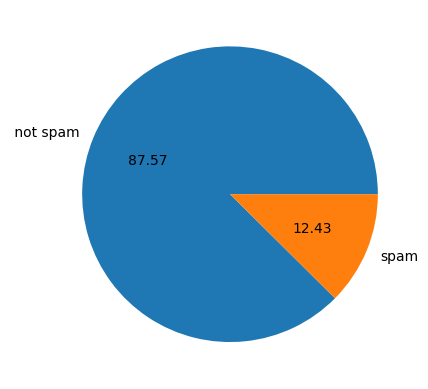

In [ ]:
plt.pie(data['Category'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# 🧹 Step 3: Text Cleaning and Preprocessing
def preprocess(text):
    # Remove punctuation and digits
    text = re.sub(r'[0-9]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase and tokenize
    words = text.lower().split()
    # Remove stopwords
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

emails['clean_text'] = emails['text'].astype(str).apply(preprocess)

In [ ]:
# 🔠 Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)  # limit features for light model
X_features = tfidf.fit_transform(emails['clean_text'])
y_labels = emails['label']

In [ ]:
# 🔀 Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.25, random_state=7)



In [ ]:
# 🤖 Step 6: Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# 🧪 Step 7: Evaluate the Model
y_pred = nb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='spam')
rec = recall_score(y_test, y_pred, pos_label='spam')



In [ ]:
# 🖨️ Step 8: Print Results
print(f"\n✅ Model Evaluation:")
print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")


✅ Model Evaluation:
Accuracy:  97.06%
Precision: 0.99
Recall:    0.80


In [ ]:
#diiferent methods also i tried but the above one is the best
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb.fit(X_train.toarray(),y_train)
y_pred1= gnb.predict(X_test.toarray())
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1, pos_label='spam'))

Accuracy score of Gaussian NB is:  0.8715003589375449
Confusion Matrix of Guassian NB is:  [[1043  158]
 [  21  171]]
Precision score of the Gaussian NB is 0.5197568389057751


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2, pos_label='spam'))

Accuracy score of Multinomial NB is:  0.9705671213208902
Confusion Matrix of Multinomial NB is:  [[1199    2]
 [  39  153]]
Precision score of the Multinomial NB is 0.9870967741935484


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3, pos_label='spam'))

Accuracy score of Bernoulli NB is:  0.9770279971284996
Confusion Matrix of Bernoulli NB is:  [[1197    4]
 [  28  164]]
Precision score of the Bernoulli NB is 0.9761904761904762
